# Tesla Stock Price Predictor
In this oblig we will complete the following task:

* Predict stock market price for TESLA. I want you to make a prediction algorithm which predicts the price of this stock on a specific date. Input will be date and output should be price of that stock (close value in the data file). You should also show the prediction percentage score. Data file: TESLA.csv For updated csv file, please download the data from: https://finance.yahoo.com/quote/TSLA/history?p=TSLA



## We'll go ahead and import all the libraries we may need later

We need the following libs: pandas, numpy & matplotlib .

To predict Tesla's stock, we use various tools. Think of Linear Regression as drawing a straight line to guess where the stock might go next. However, stocks can be tricky and don't always follow a straight path. That's where Decision Trees and Random Forests come in; they look deeper into past stock changes to make better guesses. Support Vector Regression (SVR) is like drawing a wiggly line that tries its best to follow the stock's ups and downs. Lastly, Gradient Boosting learns from its past mistakes, constantly tweaking its predictions to get them just right. All these methods help us get a clearer picture of Tesla's stock movements.

* **Linear regression**: It finds the best straight line (in two dimensions) or plane (in three dimensions) that fits the data. The "linearity" means it assumes a constant rate of change.
* **Polynomial regression**: It finds the best polynomial curve that fits the data. It's built on top of linear regression.
* **Decision tree**: Think of playing the game "20 Questions." You're trying to guess an object by asking yes/no questions like "Is it bigger than a breadbox?" or "Is it alive?". The model creates a tree-like structure of decisions. For instance, if a stock's price is above a certain value today, predict one value; if below, predict another.
* **Random forest**:  The idea behind a Random Forest is instead of playing "20 Questions" with one friend, imagine playing with a dozen friends. Each friend asks slightly different questions and makes their own guess. In the end, you take a vote, and the most popular guess is your final answer. It's an ensemble method, meaning it combines the output of multiple models (in this case, decision trees) to improve accuracy and prevent overfitting. Overitting is the case when the model learns the training data *too* well, resulting in having a hard time predicting results that doesnt follow the norm of the training data.
* **Support Vector Regression**: Suppose you're trying to fit a tube around your data points such that the tube is as wide as possible without touching most of the data points. The width of the tube represents a margin of error, and SVR tries to maximize this margin.
* **Gradient Boosting**: It builds decision trees one at a time, where each tree corrects the errors of its predecessor. The trees are combined to make a final prediction.




In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Train test split
from sklearn.model_selection import train_test_split


# The models we'll be testing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Various metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

#For MAPE we can create our own function easily as follows:
def compute_mape(actual, predicted):
    """Compute the Mean Absolute Percentage Error (MAPE)"""
    return ((abs(actual - predicted) / actual).mean()) * 100


### Let's import our dataset with pandas and take a look at it:

In [29]:
df = pd.read_csv('TSLA.csv', sep=',', parse_dates=['Date'])

In [30]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800
1,2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400
2,2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300
3,2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800
4,2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300


In [31]:
# Create time series by setting index to the Date column
df = df.set_index('Date')

# Set period to D (calendar day frequency):
df = df.to_period('D')

# We need to convert x-axis values (Date) to numbers before we can feed them into our regression model.
# To do this we create a time dummy by counting length of series and saving the values in a new column, 'Time'.
df['Time'] = np.arange(len(df.index))

df.head()

,Open,High,Low,Close,Adj Close,Volume,Time
Date,,,,,,,
2022-10-27,229.770004,233.809998,222.850006,225.089996,225.089996,61638800,0
2022-10-28,225.399994,228.860001,216.350006,228.520004,228.520004,69152400,1
2022-10-31,226.190002,229.850006,221.940002,227.539993,227.539993,61554300,2
2022-11-01,234.050003,237.399994,227.279999,227.820007,227.820007,62688800,3
2022-11-02,226.039993,227.869995,214.820007,214.979996,214.979996,63070300,4


### Now we can see that the Date column has become the new index, and there is a new numerical column, Time, containing integers.

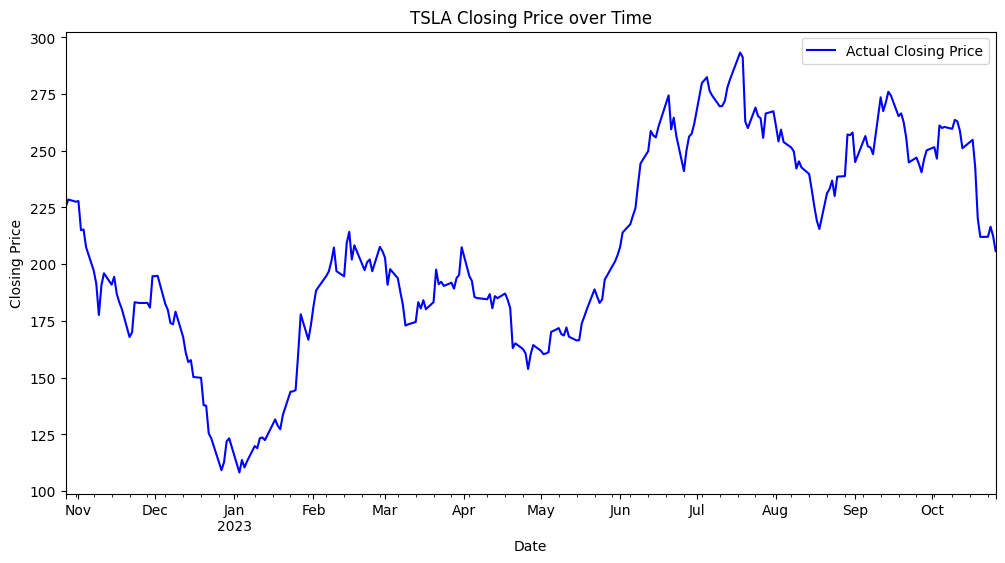

In [32]:
# Let's visualize the we're working with.

X = df.loc[:, ['Time']]
y = df.loc[:, 'Close']
df.plot(y='Close', color='blue', label='Actual Closing Price', figsize=(12,6))
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('TSLA Closing Price over Time')
plt.legend()
plt.show()

### The task is to predict the closing price from a given date.
### We have to extract the independent variable Time (the date) and the dependent variable Close. After we do that we can split it into training & test sets.

* Independent features/variables are features that are not dependent on other features. This can include age, sex, height or days in our case.
* Dependent features/variables are features that *do* depend on other factors to get a value. Closing price is a great example as it's dependent on numerous other factors.

In [33]:
# Define features (X) and targets (y):
X = df['Time'].values.reshape(-1, 1)
y = df['Close'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Now that we have our training & testing sets we can start figuring out which model works the best for our datatset. We can do this with a fairly simple loop.

In [34]:
# Create a dictionary of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regression": SVR(),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Dictionary to store the MAPE for each model
mape_scores = {}

# Dictionary to store the MAE for each model
mae_scores = {}

# Dictionary to store the MAE for each model
mse_scores = {}

# Train and evaluate each model to compute both MAPE and MAE
for model_name, model in models.items():
    # Train the model on the training set
    model.fit(X_train, y_train)

    # Predict on the testing set
    y_pred = model.predict(X_test)

    # Compute the MAPE
    mape = compute_mape(y_test, y_pred)
    mape_scores[model_name] = mape

    # Compute the MAE
    mae = mean_absolute_error(y_test, y_pred)
    mae_scores[model_name] = mae

    # Compute the MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_scores[model_name] = mse


In [35]:
mape_scores

{'Linear Regression': 13.49552804460164,
 'Decision Tree': 3.1095430562175363,
 'Random Forest': 2.7754832023086724,
 'Support Vector Regression': 12.114515450993409,
 'Gradient Boosting': 2.85208557461037}

In [36]:
mse_scores

{'Linear Regression': 862.2658582084993,
 'Decision Tree': 77.58334469887441,
 'Random Forest': 62.29844290188888,
 'Support Vector Regression': 740.3046902548103,
 'Gradient Boosting': 66.89036278405358}

### As we can see from the result above we achieved the highest success rate with Random Forest (97.23% accuracy). We'll continue using this model.

In [37]:
# Let's train the model again alone

# Train the model on the training set
model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Compute the MAPE, MAE, MSE
mape = compute_mape(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [38]:
# Find the index of the start of the testing set

train_size_index = int(len(df) * 0.8)

### Now, let's plot & visualize our results from the test set:

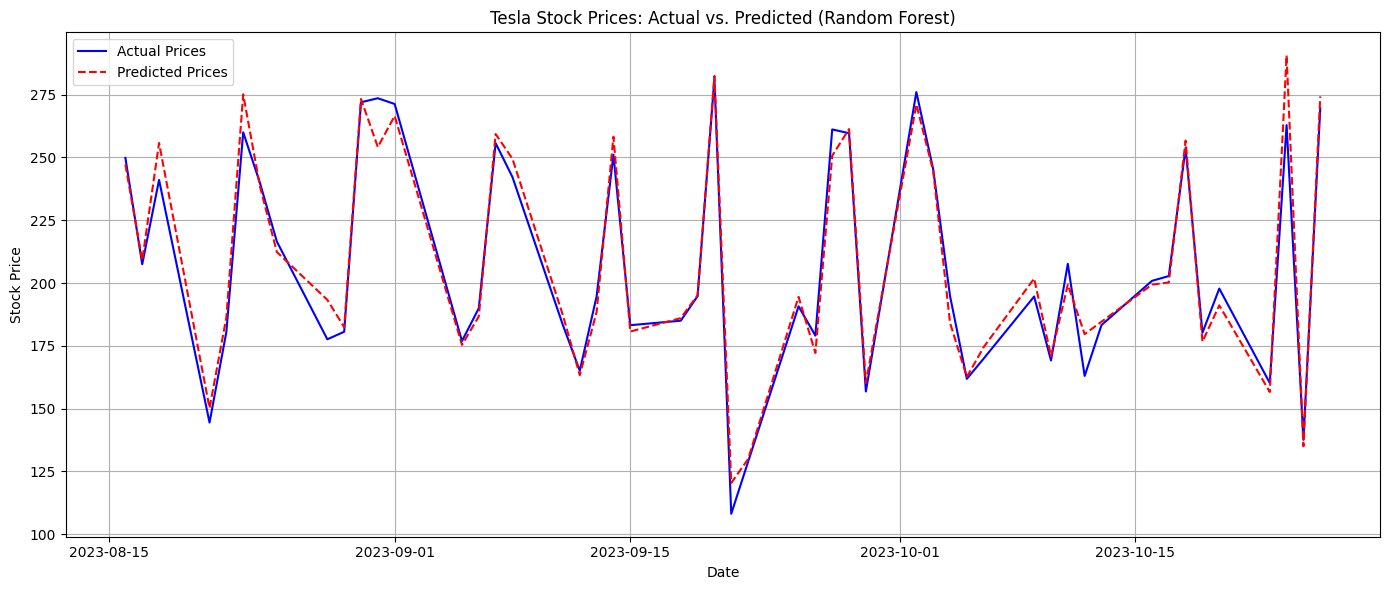

In [39]:
# Convert the 'Date' index to a date format for plotting
df.index = df.index.to_timestamp()

# Slice the DataFrame from train_size_index to the end - this subset represents the testing set
df_subset = df.iloc[train_size_index:]

# Re-plotting the actual vs. predicted values
plt.figure(figsize=(14, 6))
plt.plot(df_subset.index, y_test, label='Actual Prices', color='blue')
plt.plot(df_subset.index, y_pred, label='Predicted Prices', color='red', linestyle='dashed')
plt.title('Tesla Stock Prices: Actual vs. Predicted (Random Forest)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()